In [ ]:
WORKSHEET-1

In [ ]:
Name:Hemanta Raj Pandey
Student Number: 23357629

In [ ]:
2.1 Exercise - 1:

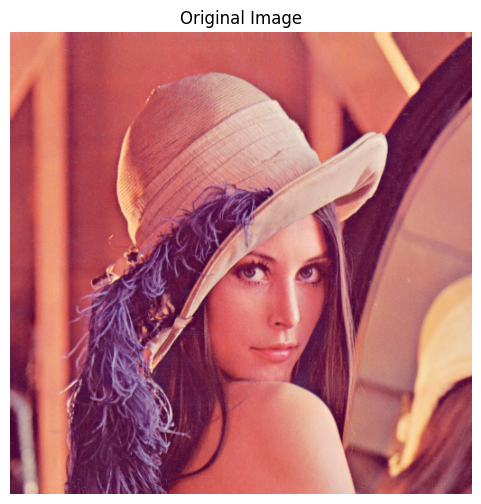

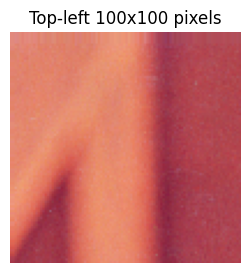

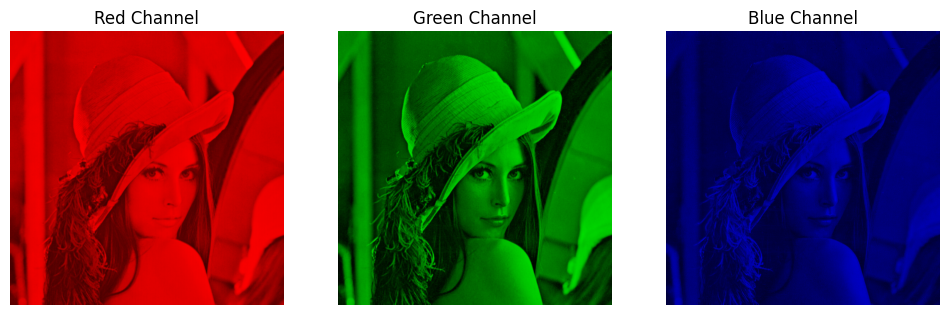

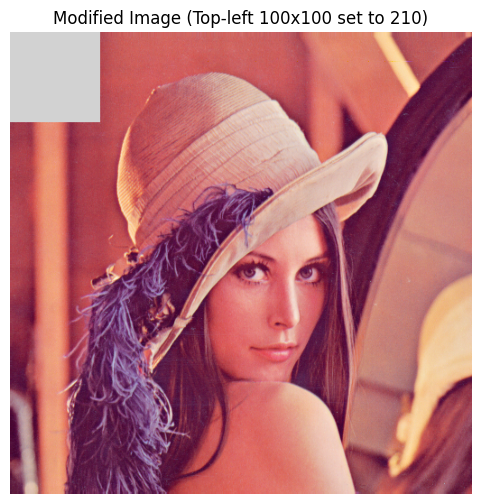

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Read and display the image
image = Image.open("Lenna_(test_image).png") 
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Convert image to NumPy array
image_np = np.array(image)

# 2. Display only the top-left corner (100x100 pixels)
top_left = image_np[:100, :100]
plt.figure(figsize=(3, 3))
plt.imshow(top_left)
plt.title("Top-left 100x100 pixels")
plt.axis("off")
plt.show()

# 3. Show the three color channels
red_channel = image_np.copy()
red_channel[:, :, 1:] = 0 

green_channel = image_np.copy()
green_channel[:, :, [0, 2]] = 0 

blue_channel = image_np.copy()
blue_channel[:, :, :2] = 0 

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(red_channel)
ax[0].set_title("Red Channel")
ax[0].axis("off")
ax[1].imshow(green_channel)
ax[1].set_title("Green Channel")
ax[1].axis("off")
ax[2].imshow(blue_channel)
ax[2].set_title("Blue Channel")
ax[2].axis("off")
plt.show()

# 4. Modify the top-left 100x100 pixels to a value of 210 (light gray)
modified_image_np = image_np.copy()
modified_image_np[:100, :100] = 210 

plt.figure(figsize=(6, 6))
plt.imshow(modified_image_np)
plt.title("Modified Image (Top-left 100x100 set to 210)")
plt.axis("off")
plt.show()


In [ ]:
2.2 Exercise - 2:

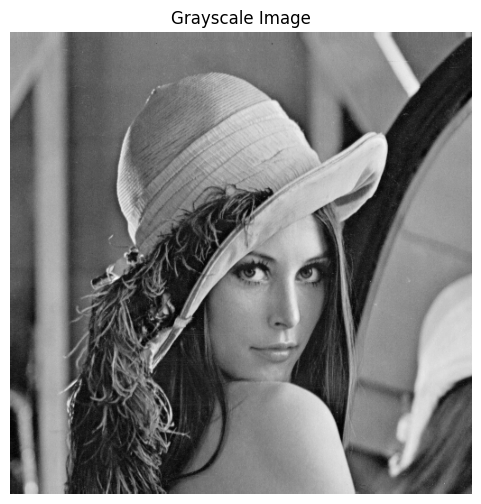

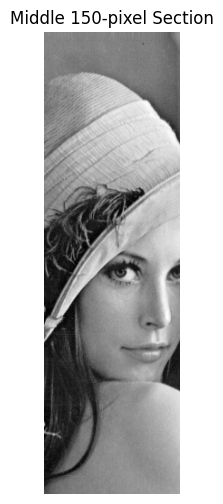

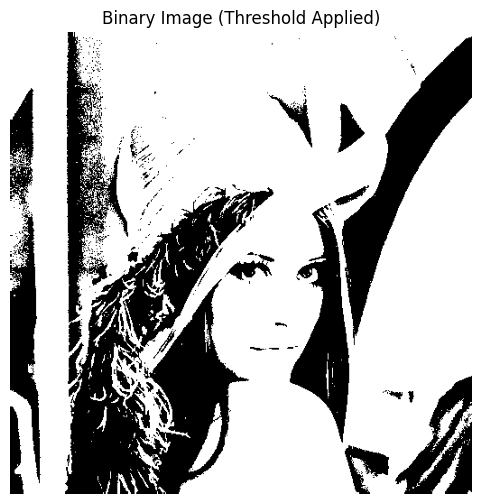

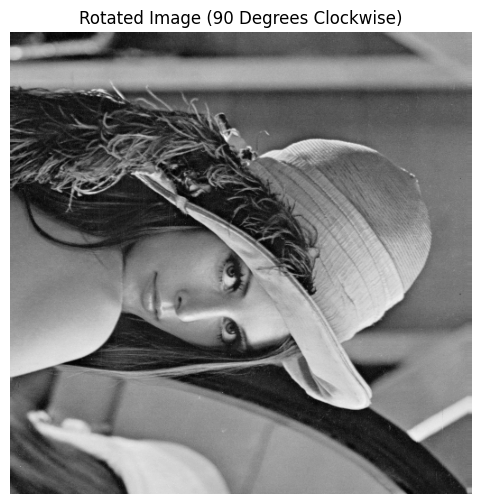

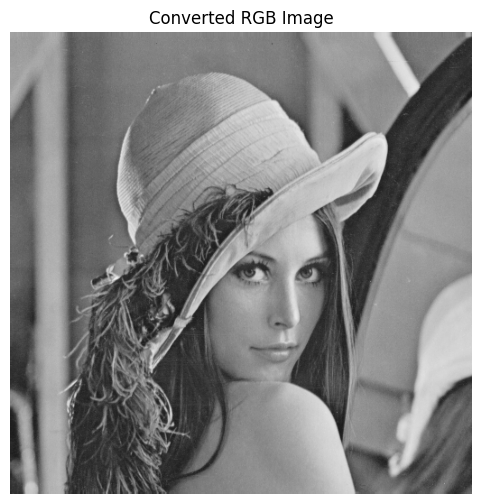

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and display a grayscale image
gray_image = Image.open("lena_gray.gif").convert("L")  
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

# Convert grayscale image to NumPy array
gray_image_np = np.array(gray_image)

# 2. Extract and display the middle section of the image (150 pixels)
height, width = gray_image_np.shape
middle_section = gray_image_np[:, width//2 - 75:width//2 + 75] 
plt.figure(figsize=(6, 6))
plt.imshow(middle_section, cmap="gray")
plt.title("Middle 150-pixel Section")
plt.axis("off")
plt.show()

# 3. Apply a simple threshold (set pixel values below 100 to 0, above 100 to 255)
threshold_image = np.where(gray_image_np < 100, 0, 255).astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.imshow(threshold_image, cmap="gray")
plt.title("Binary Image (Threshold Applied)")
plt.axis("off")
plt.show()

# 4. Rotate the image 90 degrees clockwise
rotated_image = np.rot90(gray_image_np, k=-1)  
plt.figure(figsize=(6, 6))
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Image (90 Degrees Clockwise)")
plt.axis("off")
plt.show()

# 5. Convert grayscale image to RGB
rgb_image = np.stack([gray_image_np]*3, axis=-1) 
plt.figure(figsize=(6, 6))
plt.imshow(rgb_image)
plt.title("Converted RGB Image")
plt.axis("off")
plt.show()

In [ ]:
3: Image Compression and Decompression using PCA.

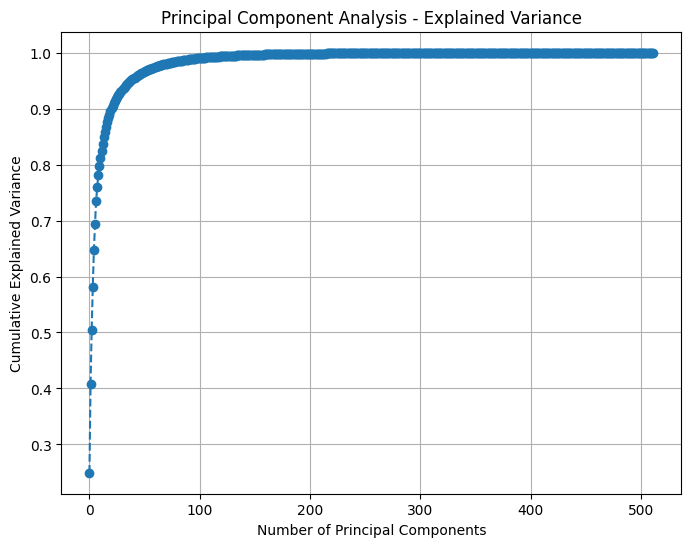

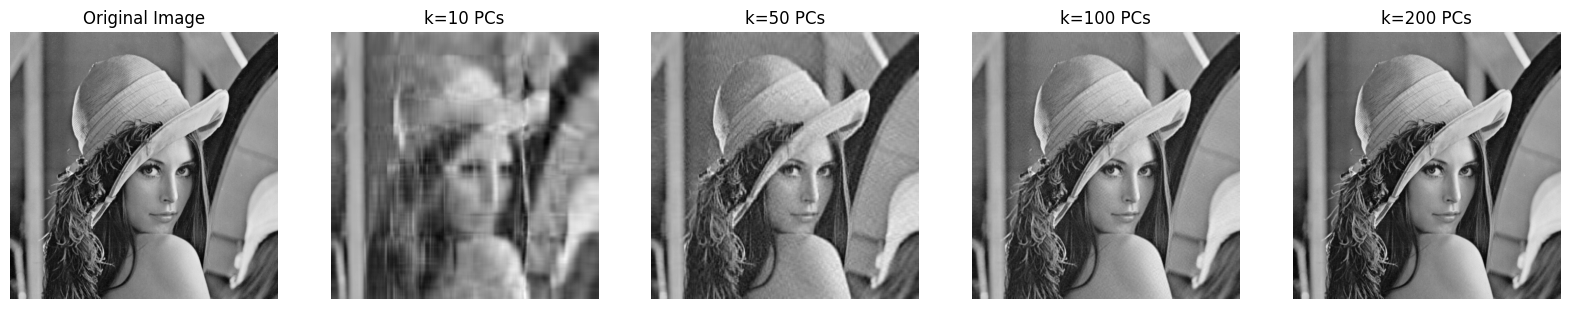

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1. Load and Prepare Data
image = Image.open("lena_gray.gif").convert("L")  
image_np = np.array(image, dtype=np.float64)

# Standardize the data (center the dataset)
mean = np.mean(image_np, axis=0)
std_image = image_np - mean

# Compute covariance matrix
cov_matrix = np.cov(std_image, rowvar=False)

# 2. Eigen Decomposition and Identifying Principal Components
# Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Identify Principal Components using cumulative sum plot
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Principal Component Analysis - Explained Variance")
plt.grid()
plt.show()

# 3. Reconstruction and Experiment
def reconstruct_image(k):
    top_eigenvectors = eigenvectors[:, :k]
    lower_dim_representation = np.dot(std_image, top_eigenvectors)
    reconstructed_image = np.dot(lower_dim_representation, top_eigenvectors.T) + mean
    return reconstructed_image

# Experiment with different values of k
k_values = [10, 50, 100, 200]  # Different levels of compression
fig, axes = plt.subplots(1, len(k_values) + 1, figsize=(20, 5))

# Original image
axes[0].imshow(image_np, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

# Reconstructed images
for i, k in enumerate(k_values):
    reconstructed = reconstruct_image(k)
    axes[i + 1].imshow(reconstructed, cmap='gray')
    axes[i + 1].set_title(f"k={k} PCs")
    axes[i + 1].axis("off")

plt.show()